# Lab __5__
## Name: __Jay lunia__
## Student ID: __8947792__

In [2]:
# Importing the necessary libraries

# Basic library
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the dataset
from sklearn import datasets

# For val train test split
from sklearn.model_selection import train_test_split

# For Modeling
from sklearn.linear_model import LinearRegression

# For getting polynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# For Cross Validation
from sklearn.model_selection import cross_validate

# For Making Pipeline
from sklearn.pipeline import Pipeline

# For Reviewing all the models 
from sklearn.metrics import make_scorer, mean_absolute_error , mean_absolute_percentage_error , r2_score


## Loading the dataset

In [3]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True , scaled=True) 
# returns 2 dataframes 
# 1. X(indepedent values) 
# 2. y(depedent value)

In [4]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
X.shape , y.shape # There are total 442 rows in the dataset

((442, 10), (442,))

## Get the data, and run a train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
X.shape , y.shape # There are total 442 rows in the dataset

((442, 10), (442,))

__Make only `train and test` dataset as in cross validation we will use the training data and it will split the data into training and validation__

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

In [9]:
# Making function for building a pipeline
def makeModelPipe(d,bias=False):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=d , include_bias=bias)), 
                    ('linear', LinearRegression())])
    return model

### 1. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8.

In [10]:
model = {}
scores = {}
_scoring = {
        'r2': make_scorer(r2_score),
        'mae': make_scorer(mean_absolute_error),
        'mape': make_scorer(mean_absolute_percentage_error)
    } # Scores we need
for i in range(9): #making total of 9 models with 0-8 degrees
    if(i == 0):
        model[i] = makeModelPipe(i,True)
    else:
        model[i] = makeModelPipe(i)
    scores[i] = cross_validate(model[i], X_train, y_train, 
                               cv=10, # Making 10 cross-validation splits for each model
                               scoring = _scoring, 
                               n_jobs=-1, 
                               verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

__Got the scoring options from <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#scoring'>here</a>__

### 2. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared, Mean Absolute Error (MAE) and MAPE metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values

__Converting the scores data into the dataframe__<br>
_however this is a `3 dimensional` array so we need to convert it into 2-D_
- cols = number of models degree
- rows = the scores data
- each row =  It is a array of size `10` where the scores of each model is given for each different training-validation split is made

In [11]:
scores_m_std = pd.DataFrame(scores)
scores_m_std

,0,1,2,3,4,5,6,7,8
fit_time,"[0.013999700546264648, 0.012998342514038086, 0...","[0.008003711700439453, 0.009000062942504883, 0...","[0.14600014686584473, 0.1419816017150879, 0.13...","[0.08600401878356934, 0.08398008346557617, 0.1...","[0.21200895309448242, 0.18500328063964844, 0.1...","[1.2760443687438965, 1.0529999732971191, 1.056...","[4.675012826919556, 4.617011785507202, 5.04301...","[12.470008850097656, 12.017998933792114, 12.45...","[30.347004175186157, 30.343001127243042, 29.20..."
score_time,"[0.009002447128295898, 0.008998870849609375, 0...","[0.00800466537475586, 0.00699925422668457, 0.0...","[0.009002685546875, 0.0050048828125, 0.0050048...","[0.007998943328857422, 0.007998943328857422, 0...","[0.008993148803710938, 0.01200103759765625, 0....","[0.01996445655822754, 0.019997596740722656, 0....","[0.03200674057006836, 0.02099609375, 0.0239953...","[0.029011249542236328, 0.03800606727600098, 0....","[0.05199766159057617, 0.057004690170288086, 0...."
test_r2,"[-0.025615525898048164, -0.048373111741410346,...","[0.5160535228524309, 0.49612696616477014, 0.50...","[0.2891775559704235, 0.47227790517172763, 0.15...","[-166.96342605515184, -460.50076346556494, -21...","[-33.10150119368257, -88.2316885570975, -138.6...","[-29.605090002284005, -86.52838468222888, -119...","[-29.600064929762375, -86.49300692809105, -119...","[-29.600387518910352, -86.49241689040721, -119...","[-29.40203185920863, -86.49236737863072, -119...."
test_mae,"[66.19575885033298, 56.74886084822994, 66.7695...","[43.14293285833509, 39.09282763608994, 42.2149...","[51.13678347828271, 38.83805221806236, 52.2430...","[304.87396663508935, 561.4288206245186, 227.08...","[292.2028048095121, 361.8785482829723, 458.845...","[280.3436789453083, 358.9130836702312, 430.211...","[280.34021359899714, 358.93581367349486, 430.1...","[280.3441163285009, 358.93630767149534, 430.17...","[280.74257901777855, 358.93633041079994, 430.1..."
test_mape,"[0.7694444146154952, 0.5811836306195994, 0.697...","[0.45432695421872993, 0.3490844347651525, 0.41...","[0.47437703061776243, 0.3401918313108824, 0.51...","[2.1717132188594923, 4.7994574447746015, 2.399...","[3.415228998165721, 3.450134518975473, 3.97943...","[3.332698003881296, 3.4020043860636733, 3.7743...","[3.332285506143309, 3.401908911978449, 3.77452...","[3.3323232749264458, 3.401904643281048, 3.7744...","[3.3460495410983535, 3.4019048988982323, 3.774..."


In [12]:
scores_copy = scores_m_std.copy() 

for c,col in enumerate(scores_copy):
    for idx,row in enumerate(scores_copy[col]):
        scores_copy.iloc[idx,c] = [scores_copy.iloc[idx,c].mean(),scores_copy.iloc[idx,c].std()]

__Calculated the mean and the standard deviation of each model__

In [13]:
final_scores = scores_copy.T
final_scores = final_scores[['test_r2','test_mae','test_mape']]
final_scores

,test_r2,test_mae,test_mape
0,"[-0.03440138456124904, 0.02686173465735655]","[66.73452476846143, 6.453801184049387]","[0.6293930920712683, 0.10361681474028156]"
1,"[0.46210729103136294, 0.12142639637812595]","[45.52071883346078, 5.043920220598886]","[0.401160227137406, 0.05749295536490003]"
2,"[0.35906452332265376, 0.16261072470022894]","[48.35107964213893, 6.160539304057348]","[0.41641824386720544, 0.06479251170295464]"
3,"[-347.68142215869045, 644.8366505166546]","[368.3391437562704, 214.18732466193532]","[2.9599319363443284, 1.915904943356464]"
4,"[-43.87765089031509, 37.617770256979604]","[298.24512597066445, 71.75087358912165]","[2.512291708419431, 0.7869847417992494]"
5,"[-40.663944001196185, 33.31409440224908]","[289.92558404302287, 67.20324989231904]","[2.4654792249513355, 0.7496979719903665]"
6,"[-40.64836732993575, 33.303421727545945]","[289.8950746972066, 67.19932777680964]","[2.4652278976284974, 0.7497358561363989]"
7,"[-40.64823327812227, 33.30257116842996]","[289.89500436176013, 67.1988556813432]","[2.465240930894845, 0.7497322761564733]"
8,"[-40.63908449446582, 33.30175663453859]","[289.9520593574372, 67.17959222223202]","[2.466632859034017, 0.7513063299736152]"


__`Transposed` the data frame for better representation to the data frame__

In [14]:
final_scores_2 = pd.DataFrame()
for c,col in enumerate(final_scores):
    for idx,row in enumerate(final_scores[col]):
        # print(idx,row[0],row[1])
        final_scores_2.loc[idx,f'{col}_mean'] = row[0]
        final_scores_2.loc[idx,f'{col}_std'] = row[1]
        

__Making the `mean` and `std` as different columns__

In [15]:
final_scores_2

,test_r2_mean,test_r2_std,test_mae_mean,test_mae_std,test_mape_mean,test_mape_std
0,-0.034401,0.026862,66.734525,6.453801,0.629393,0.103617
1,0.462107,0.121426,45.520719,5.043920,0.401160,0.057493
2,0.359065,0.162611,48.351080,6.160539,0.416418,0.064793
3,-347.681422,644.836651,368.339144,214.187325,2.959932,1.915905
4,-43.877651,37.617770,298.245126,71.750874,2.512292,0.786985
5,-40.663944,33.314094,289.925584,67.203250,2.465479,0.749698
6,-40.648367,33.303422,289.895075,67.199328,2.465228,0.749736
7,-40.648233,33.302571,289.895004,67.198856,2.465241,0.749732
8,-40.639084,33.301757,289.952059,67.179592,2.466633,0.751306


In [16]:
final_scores_2.rename(columns={'test_r2_mean':'r2_mean','test_r2_std':'r2_std','test_mae_mean':'mae_mean','test_mae_std':'mae_std','test_mape_mean':'mape_mean','test_mape_std':'mape_std'},inplace=True)

In [17]:
final_scores_2.index.name = 'Polynomial Degree'

- _`Renamed` the columns_
- _`named` the index_
- _make the `MAE` and `MAPE` positive_

In [18]:
final_scores_2

,r2_mean,r2_std,mae_mean,mae_std,mape_mean,mape_std
Polynomial Degree,,,,,,
0,-0.034401,0.026862,66.734525,6.453801,0.629393,0.103617
1,0.462107,0.121426,45.520719,5.043920,0.401160,0.057493
2,0.359065,0.162611,48.351080,6.160539,0.416418,0.064793
3,-347.681422,644.836651,368.339144,214.187325,2.959932,1.915905
4,-43.877651,37.617770,298.245126,71.750874,2.512292,0.786985
5,-40.663944,33.314094,289.925584,67.203250,2.465479,0.749698
6,-40.648367,33.303422,289.895075,67.199328,2.465228,0.749736
7,-40.648233,33.302571,289.895004,67.198856,2.465241,0.749732
8,-40.639084,33.301757,289.952059,67.179592,2.466633,0.751306


### 3. Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared, MAE and MAPE metrics. Provide an explanation for choosing this specific model. (1 points)

#### Selecting the Multi Variant Linear Regression  model with `degree 2` because
- It has the `highest R-squared value` (0.4621), indicating that it explains more of the variance in the target variable compared to the other models.

- The Multivariate Linear Regression has the `lowest MAPE` (0.40), indicating that, on average, its predictions are closest to the actual values.

- After analyzing the results, I recommend deploying the `Multi Variant Linear Regression` model with `degree-2` for it strikes a balance between capturing underlying patterns in the data (high R-squared) and making accurate predictions (relatively low MAE).

In [19]:
model = makeModelPipe(1) #degree=1
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

### Analyzing the model on the `test data`

In [20]:
def getMetrics(y,y_pred):
    print(f'Mean Absolute Precentage error: {(mean_absolute_percentage_error(y, y_pred)*100):.2f}%')
    print(f'Mean Absolute error: {mean_absolute_error(y, y_pred):.2f}')
    print(f'The model is preforming {r2_score(y,y_pred)*100:.2f}% better than a navie model')

In [21]:
getMetrics(y_test,y_pred)

Mean Absolute Precentage error: 39.22%
Mean Absolute error: 40.41
The model is preforming 50.42% better than a navie model


### 4. Additional analysis and interpretation of the models' performances. You may explore further insights beyond the required metrics. The analysis should provide at least one relevant insight about the choice of the best model, or about characteristics of the chosen one.

#### Visualizing the preformace of each model

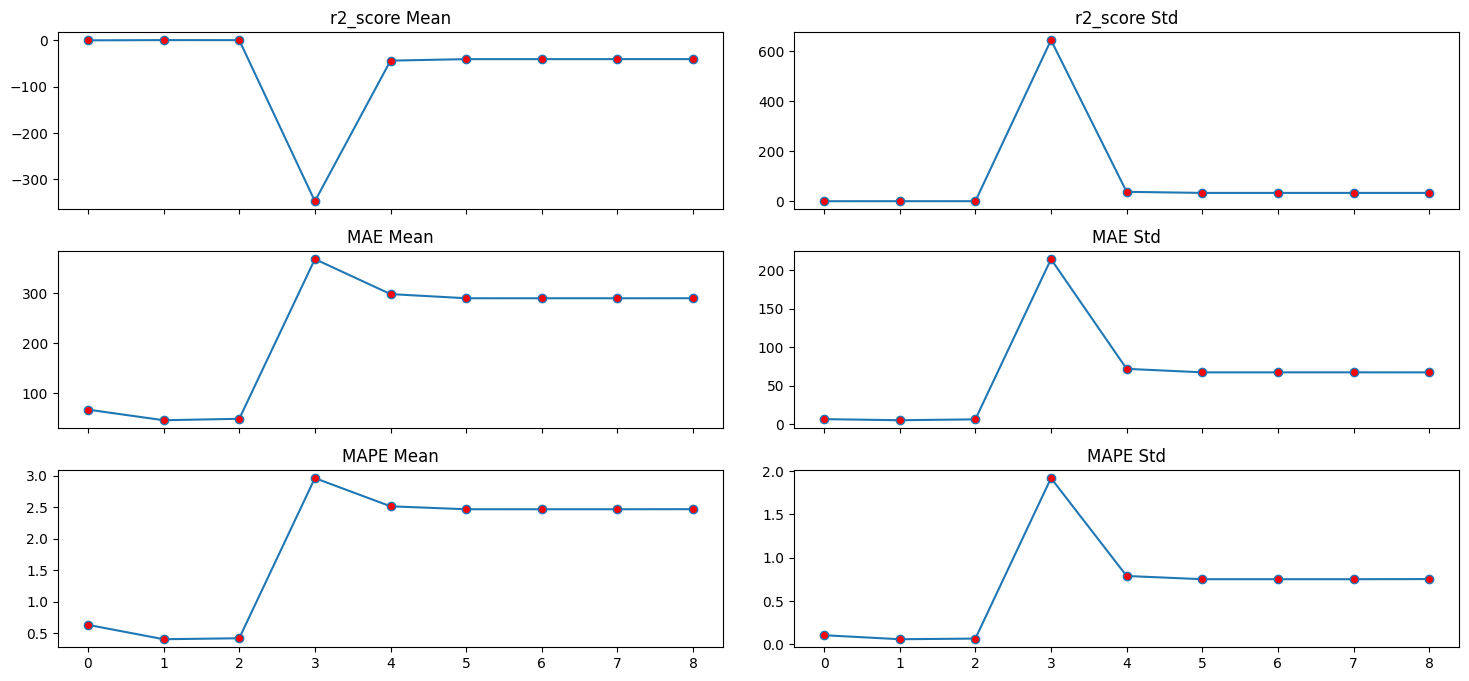

In [22]:
fig, ax = plt.subplots(3,2,figsize =[15,7], sharex=True)
fig.tight_layout(pad=2.0)
ax[0,0].set_title('r2_score Mean')
ax[0,0].plot(final_scores_2['r2_mean'], marker='o', mfc='r')

ax[0,1].set_title('r2_score Std')
ax[0,1].plot(final_scores_2['r2_std'], marker='o', mfc='r')

ax[1,0].set_title('MAE Mean')
ax[1,0].plot(final_scores_2['mae_mean'], marker='o', mfc='r')

ax[1,1].set_title('MAE Std')
ax[1,1].plot(final_scores_2['mae_std'], marker='o', mfc='r')

ax[2,0].set_title('MAPE Mean')
ax[2,0].plot(final_scores_2['mape_mean'], marker='o', mfc='r')

ax[2,1].set_title('MAPE Std')
ax[2,1].plot(final_scores_2['mape_std'], marker='o', mfc='r')
plt.show()

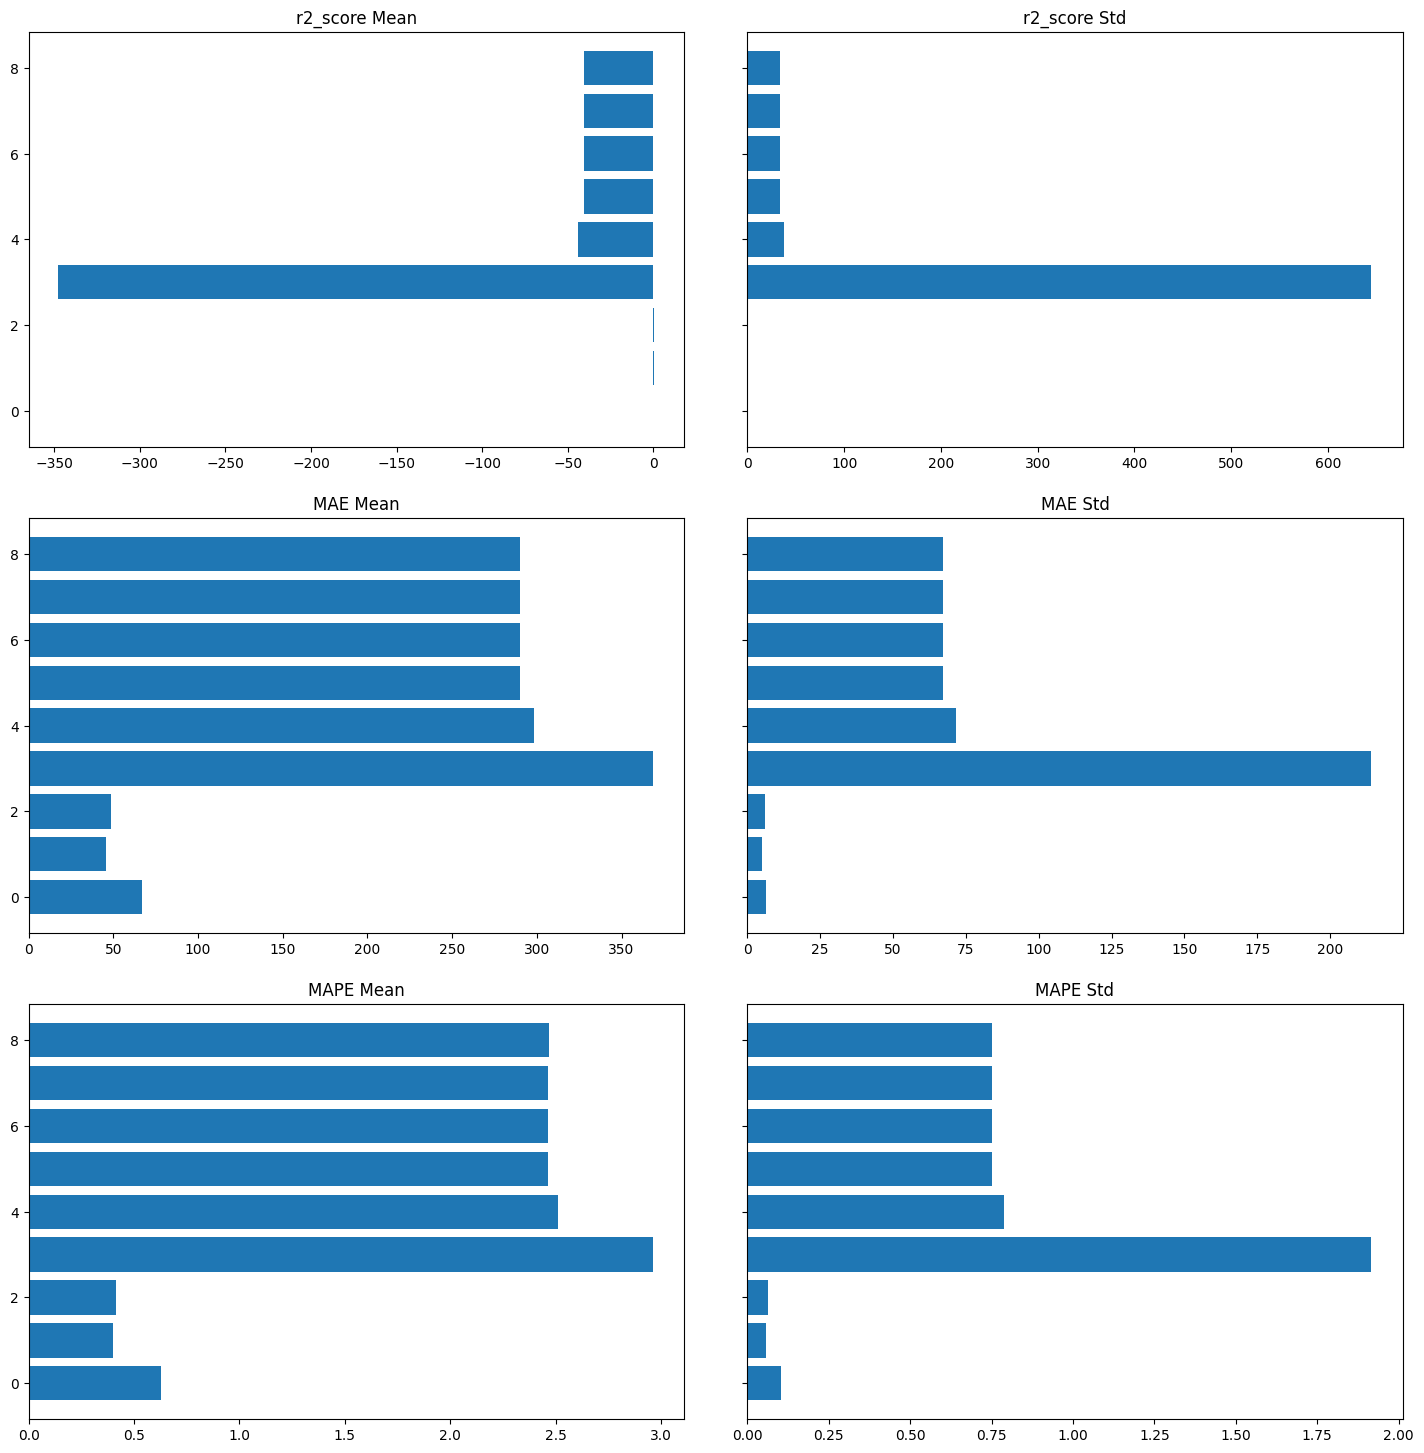

In [23]:
idx = final_scores_2.index.values

fig, ax = plt.subplots(3,2,figsize =[15,15], sharey=True, )
fig.tight_layout(pad=3.0)
ax[0,0].set_title('r2_score Mean')
ax[0,0].barh(idx ,final_scores_2['r2_mean'])

ax[0,1].set_title('r2_score Std')
ax[0,1].barh(idx ,final_scores_2['r2_std'])

ax[1,0].set_title('MAE Mean')
ax[1,0].barh(idx ,final_scores_2['mae_mean'])

ax[1,1].set_title('MAE Std')
ax[1,1].barh(idx ,final_scores_2['mae_std'])

ax[2,0].set_title('MAPE Mean')
ax[2,0].barh(idx ,final_scores_2['mape_mean'])

ax[2,1].set_title('MAPE Std')
ax[2,1].barh(idx ,final_scores_2['mape_std'])
plt.show()

#### The `worst performing model` is clearly with `degree 3` as:
- As the `r2 score` is out of the ideal range i.e [0,1] also way `lower` than any other model
- The `MAPE` is `>2` which means that the errors are `much greater` then the actual values
- Also the `MAE` is also `highest` among all the models
- The `spread` (standard deviation) of all the performance martix is also `very high` which means that the results of the data is `highly sensitive` towards the data selection 

### Other Models between the `degree 4-8`
- All these models almost have the same performance which is mean after the model with `degree 4` we are just `increasing the complexity and the features` of the model
- Also all the models have an negative `r2 score` means that the model doesn't fit the data well and is `performing worse than a navie model`
- The `MAPE` is `>2.5 approx` which mean the erros are `2.5 times greater` then the actual values

#### The `best performing model` is with `degree 1 and 2` as:
- Both the models are almost same however the model with `degree 1` have better performance
- Also , the `less complex` model we should definately go for the model with `degree 1`
- Moreover, The `spread` of the matrics are also `very less` which means the model give almost the `same performance` irrespective of the dataset distribution selection